In [1]:
from detect.fall_detection.detect import run_yolo
from models.common import DetectMultiBackend
import torch

/Users/maochenhui/miniforge3/envs/DL/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


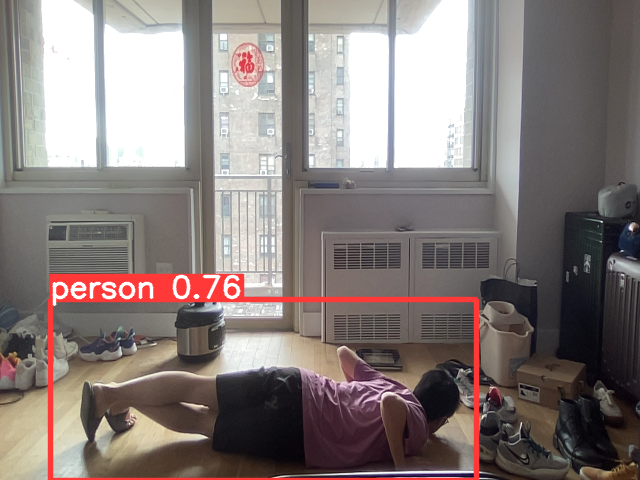

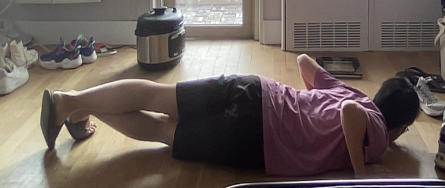

In [2]:
weights = "./runs/train/yolov5n/weights/best.pt"
source = "./data/dataset/Fall_Detection_Object/Test/Fall_Person_valid_000002.png"
data = "./data/custom.yaml"
imgsz = (416, 416)
view_img = True

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = DetectMultiBackend(weights, device=device, data=data)
img0, boxes = run_yolo(model, device, source=source, imgsz=imgsz, view_img=view_img)

In [12]:
from collections import deque

boxes = deque(maxlen=3)
boxes.append(torch.randn((3,112,112)))
boxes.append(torch.randn((3,112,112)))
boxes.append(torch.randn((3,112,112)))

In [14]:
torch.stack(list(boxes), dim=0).shape

torch.Size([3, 3, 112, 112])

In [6]:
demo = [[0.3,0.7]]
demo = torch.tensor(demo)
torch.argmax(demo, dim=1)

tensor([1])